<a href="https://colab.research.google.com/github/NitichayaG/PMU-B-PersonalAI/blob/main/HW_Niti_MTNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Download Datasets**

In [ ]:
!wget -q -cO - https://zenodo.org/records/3941387/files/teaching_2018_features_tfidf_256.csv?download=1 > teaching_2018.csv
!wget -q -cO -  https://zenodo.org/records/3941387/files/teaching_2019_features_tfidf_256.csv?download=1 > teaching_2019.csv
!wget -q -cO -  https://zenodo.org/records/3941387/files/mentalhealth_2018_features_tfidf_256.csv?download=1 > mental.csv

# **Import packages**

In [ ]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import KernelPCA, PCA

# **Load data**

In [ ]:
teaching_2018 = pd.read_csv('teaching_2018.csv')
teaching_2019 = pd.read_csv('teaching_2019.csv')
mental = pd.read_csv('mental.csv')

In [ ]:
teaching_2018#.head(2)

In [ ]:
teaching_2019.head(2)

,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
0,teaching,Nakatsukasa,2019/01/01,"First time teaching class of 9-13 Hello, I'm c...",9.250539,9.015402,9.298815,62.458419,59.849673,11.833007,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.144586,0.0,0.0,0.000000
1,teaching,zdnewcomb,2019/01/01,How do I get my 6th graders to care about poet...,4.613466,5.944906,5.441854,80.658888,70.085526,8.816746,...,0.0,0.0,0.0,0.08273,0.0,0.0,0.080726,0.0,0.0,0.219539


In [ ]:
mental.head(2)

,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
0,mentalhealth,LilUziVertsAutotune,2018/01/01,Any idea what this is? So I came here for awns...,1.198856,2.857999,2.614963,96.068711,79.778689,6.075708,...,0.0,0.0,0.0,0.000000,0.0,0.00000,0.156102,0.120129,0.0,0.070755
1,mentalhealth,Kyzzen,2018/01/01,"Advice, please. I've been getting so easily en...",3.750551,6.140822,4.610385,81.303782,74.730769,7.564103,...,0.0,0.0,0.0,0.079632,0.0,0.11147,0.077702,0.119593,0.0,0.000000


**Combine data together**

In [ ]:
df = pd.concat([teaching_2018, teaching_2019, mental])
del teaching_2018, teaching_2019, mental

In [ ]:
df

,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
0,teaching,wdead,2018/01/01,Looking for BIG digital timers for my 7th grad...,6.205652,6.216433,6.272283,80.817554,66.028986,9.218841,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.133644
1,teaching,tiger-bulldog1318,2018/01/02,School turnaround from the teacher’s perspecti...,7.191104,10.905849,6.144719,67.801364,70.060606,8.619913,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.260589,0.000000,0.0,0.118115
2,teaching,PMcommenter,2018/01/02,Where on high school &amp; college campuses ca...,6.961154,8.008078,7.135026,71.693308,64.512821,9.829744,...,0.0,0.139954,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3,teaching,amylizzie12,2018/01/02,What have you used to keep your students busy ...,7.132836,9.284230,5.662866,78.329522,64.970149,8.345075,...,0.0,0.000000,0.000000,0.416899,0.0,0.000000,0.000000,0.000000,0.0,0.000000
4,teaching,ravensandcrowsohmy,2018/01/02,"Flexible, Free Vocabulary App/Website with a F...",7.278080,8.537186,6.422609,76.326014,63.891304,9.176812,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,mentalhealth,riverisaberry,2018/04/20,Does Anyone Have Chronic Hyperventilation Synd...,-0.313579,1.816079,2.206408,94.016471,89.141844,5.019775,...,0.0,0.000000,0.203621,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3356,mentalhealth,eshmaalfatin,2018/04/20,Psychiatrist in Dubai &amp; Abu Dhabi - Genera...,18.585441,21.801888,14.813529,19.135882,39.735294,19.741176,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3357,mentalhealth,themonstrumologist,2018/04/20,My best friend just brought this to my attenti...,0.995289,3.198568,2.559184,93.338197,83.438776,5.978231,...,0.0,0.128253,0.000000,0.000000,0.0,0.000000,0.094513,0.145466,0.0,0.000000
3358,mentalhealth,scndplace,2018/04/20,Why do I get depressed instead of sad? i wanna...,1.554975,3.657596,3.223969,89.946908,80.614583,5.917105,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000


In [ ]:
j = 0
for i in df.columns:
  if i[:5] == 'tfidf':
    print(j)
  j +=1

# **Data exploration**

<Axes: >

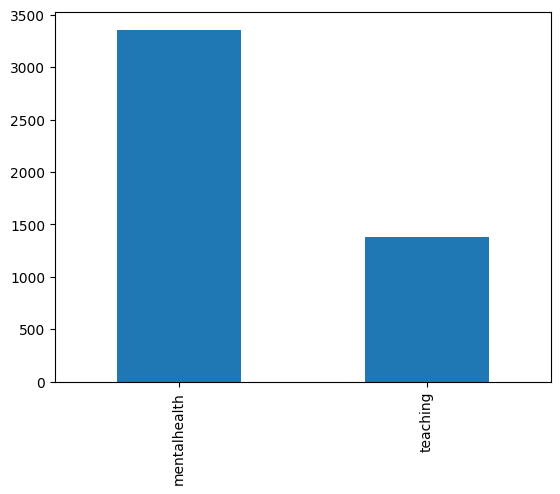

In [ ]:
df.subreddit.value_counts().plot(kind='bar')

In [ ]:
df[df.subreddit == 'mentalhealth']

,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
0,mentalhealth,LilUziVertsAutotune,2018/01/01,Any idea what this is? So I came here for awns...,1.198856,2.857999,2.614963,96.068711,79.778689,6.075708,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.156102,0.120129,0.0,0.070755
1,mentalhealth,Kyzzen,2018/01/01,"Advice, please. I've been getting so easily en...",3.750551,6.140822,4.610385,81.303782,74.730769,7.564103,...,0.0,0.000000,0.000000,0.079632,0.0,0.111470,0.077702,0.119593,0.0,0.000000
2,mentalhealth,somerandomperson93,2018/01/01,Can aggressive behavior in humans be modified ...,2.283719,5.060112,4.120739,80.276724,83.655172,7.452217,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3,mentalhealth,121802,2018/01/01,I heard my parents having sex and i need serio...,2.321256,3.903792,3.250098,93.091890,76.335984,6.380933,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.186966,0.000000,0.0,0.084745
4,mentalhealth,Mewdot,2018/01/01,From the inside out This will probably be a lo...,3.879535,4.522727,5.183793,84.385645,71.224138,8.017683,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.051410,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,mentalhealth,riverisaberry,2018/04/20,Does Anyone Have Chronic Hyperventilation Synd...,-0.313579,1.816079,2.206408,94.016471,89.141844,5.019775,...,0.0,0.000000,0.203621,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3356,mentalhealth,eshmaalfatin,2018/04/20,Psychiatrist in Dubai &amp; Abu Dhabi - Genera...,18.585441,21.801888,14.813529,19.135882,39.735294,19.741176,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3357,mentalhealth,themonstrumologist,2018/04/20,My best friend just brought this to my attenti...,0.995289,3.198568,2.559184,93.338197,83.438776,5.978231,...,0.0,0.128253,0.000000,0.000000,0.0,0.000000,0.094513,0.145466,0.0,0.000000
3358,mentalhealth,scndplace,2018/04/20,Why do I get depressed instead of sad? i wanna...,1.554975,3.657596,3.223969,89.946908,80.614583,5.917105,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000


In [ ]:
txt = ' '.join(df[df.subreddit == 'teaching'].post.values)
word_list = txt.split()
Counter(word_list).most_common()

[('I', 7943),
 ('to', 6939),
 ('the', 6099),
 ('and', 5863),
 ('a', 5715),
 ('in', 3447),
 ('of', 3422),
 ('my', 2788),
 ('for', 2679),
 ('that', 2127),
 ('is', 2076),
 ('have', 2004),
 ('with', 1628),
 ('this', 1399),
 ('be', 1352),
 ('but', 1347),
 ('on', 1323),
 ('it', 1298),
 ('you', 1246),
 ("I'm", 1083),
 ('was', 1070),
 ('are', 1038),
 ('at', 1038),
 ('me', 1036),
 ('as', 1031),
 ('or', 1024),
 ('not', 971),
 ('am', 969),
 ('do', 937),
 ('school', 892),
 ('teaching', 888),
 ('so', 875),
 ('about', 867),
 ('they', 823),
 ('an', 812),
 ('if', 751),
 ('just', 737),
 ('would', 733),
 ('like', 725),
 ('what', 695),
 ('teacher', 688),
 ('can', 666),
 ('students', 662),
 ('get', 660),
 ('from', 635),
 ('know', 632),
 ('any', 628),
 ('out', 582),
 ('all', 573),
 ('been', 570),
 ('some', 564),
 ('them', 545),
 ('I’m', 543),
 ('how', 536),
 ('their', 507),
 ('want', 503),
 ('will', 491),
 ('had', 470),
 ('has', 466),
 ('year', 464),
 ('more', 462),
 ('up', 453),
 ("I've", 449),
 ('student

In [ ]:
txt = ' '.join(df[df.subreddit == 'mentalhealth'].post.values)
word_list = txt.split()
Counter(word_list).most_common()[:20]

[('I', 40642),
 ('to', 25944),
 ('and', 24392),
 ('a', 17054),
 ('the', 16193),
 ('my', 13687),
 ('of', 12370),
 ('that', 8708),
 ('in', 8533),
 ('have', 7296),
 ('for', 7250),
 ('is', 7168),
 ('it', 6905),
 ('with', 6838),
 ('me', 6760),
 ('but', 6553),
 ('was', 5945),
 ('this', 5085),
 ('like', 5069),
 ("I'm", 4852)]

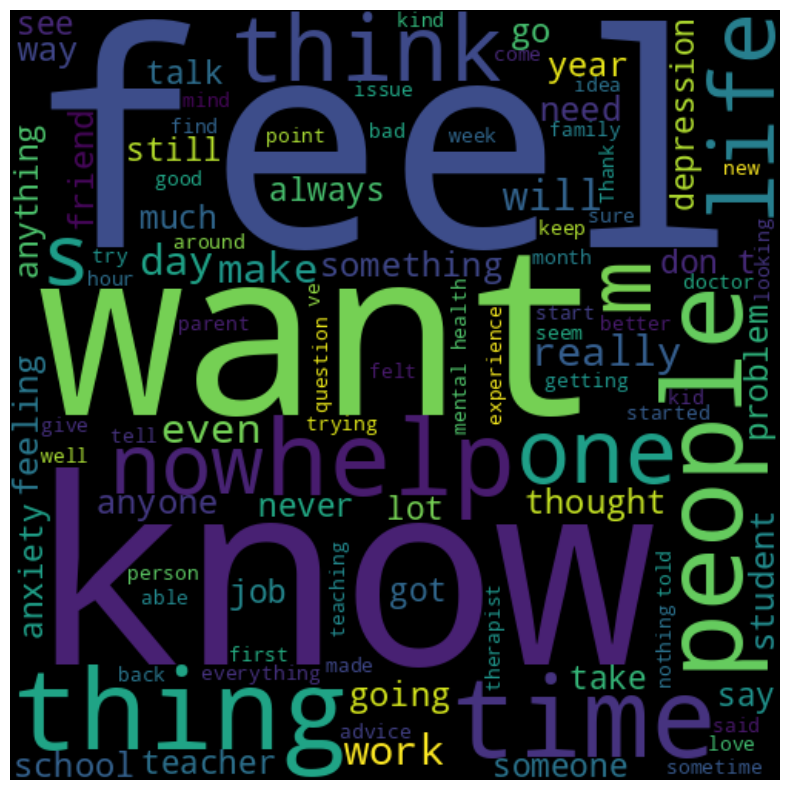

In [ ]:
wordcloud = WordCloud(
        background_color = 'black',
        width = 500,
        height = 500,
        max_words=100,
        stopwords = set(STOPWORDS)).generate(str(' '.join(df.post.values)))

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

In [ ]:
# สร้าง Wordcloud ประเภท Teaching ด้วยตนเอง
wordcloud = WordCloud(
        background_color = 'black',
        width = 500,
        height = 500,
        max_words=100,
        stopwords = set(STOPWORDS)).generate(str(' '.join(df[df.subreddit == 'teaching'].post.values)))

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

In [ ]:
# สร้าง Wordcloud ประเภท Mentalhealth ด้วยตนเอง
wordcloud = WordCloud(
        background_color = 'black',
        width = 500,
        height = 500,
        max_words=100,
        stopwords = set(STOPWORDS)).generate(str(' '.join(df[df.subreddit == 'mentalhealth'].post.values)))

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

# **Feature extraction**

In [ ]:
vectorizer = CountVectorizer()

# ให้ทำการแปลงข้อความให้เป็น Feature โดยการระบุข้อมูลที่ใช้ในการแปลงให้ถูกต้อง

# X = vectorizer.fit_transform(_____)

corpus = df['post']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [ ]:
print(X.shape)
print(X.toarray())
print(vectorizer.get_feature_names_out())

(4736, 21793)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['00' '000' '00pm' ... 'محمد' 'مدرسة' 'ㄅㄆㄇㄈ']


# **Split Data into training and test sets**

In [ ]:
df['label'] = pd.Categorical(df.subreddit).codes

In [ ]:
df

,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,...,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year,label
0,teaching,wdead,2018/01/01,Looking for BIG digital timers for my 7th grad...,6.205652,6.216433,6.272283,80.817554,66.028986,9.218841,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.133644,1
1,teaching,tiger-bulldog1318,2018/01/02,School turnaround from the teacher’s perspecti...,7.191104,10.905849,6.144719,67.801364,70.060606,8.619913,...,0.000000,0.000000,0.000000,0.0,0.000000,0.260589,0.000000,0.0,0.118115,1
2,teaching,PMcommenter,2018/01/02,Where on high school &amp; college campuses ca...,6.961154,8.008078,7.135026,71.693308,64.512821,9.829744,...,0.139954,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1
3,teaching,amylizzie12,2018/01/02,What have you used to keep your students busy ...,7.132836,9.284230,5.662866,78.329522,64.970149,8.345075,...,0.000000,0.000000,0.416899,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1
4,teaching,ravensandcrowsohmy,2018/01/02,"Flexible, Free Vocabulary App/Website with a F...",7.278080,8.537186,6.422609,76.326014,63.891304,9.176812,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,mentalhealth,riverisaberry,2018/04/20,Does Anyone Have Chronic Hyperventilation Synd...,-0.313579,1.816079,2.206408,94.016471,89.141844,5.019775,...,0.000000,0.203621,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0
3356,mentalhealth,eshmaalfatin,2018/04/20,Psychiatrist in Dubai &amp; Abu Dhabi - Genera...,18.585441,21.801888,14.813529,19.135882,39.735294,19.741176,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0
3357,mentalhealth,themonstrumologist,2018/04/20,My best friend just brought this to my attenti...,0.995289,3.198568,2.559184,93.338197,83.438776,5.978231,...,0.128253,0.000000,0.000000,0.0,0.000000,0.094513,0.145466,0.0,0.000000,0
3358,mentalhealth,scndplace,2018/04/20,Why do I get depressed instead of sad? i wanna...,1.554975,3.657596,3.223969,89.946908,80.614583,5.917105,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0


In [ ]:
# ให้ระบุคอลัมน์ ที่จะใช้เป็น label เพื่อที่จะใช้ในการสอนและทำนาย

# y = _________

y = df['label']
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

# **Modelling**

In [ ]:
log = LogisticRegression(random_state=0).fit(X_train, y_train)

print(log.predict(X_test[:10]))
print(log.predict_proba(X_test[:10]))
print(log.score(X_test, y_test))

[0 0 0 0 0 1 1 1 0 0]
[[1.00000000e+00 3.57649751e-11]
 [9.87386539e-01 1.26134610e-02]
 [9.44613382e-01 5.53866176e-02]
 [9.86589784e-01 1.34102156e-02]
 [9.16650999e-01 8.33490015e-02]
 [1.06248030e-03 9.98937520e-01]
 [5.53933406e-04 9.99446067e-01]
 [1.24891117e-03 9.98751089e-01]
 [9.99999865e-01 1.34623266e-07]
 [9.99999652e-01 3.48177151e-07]]
0.971850809289233


**ให้ทดลองสร้างโมเดล ด้วย Algorithms อื่นๆ ด้วยตัวเอง อีก 2 โมเดล**

In [ ]:
# clf1 = ________(random_state=0).fit(X_train, y_train)

# print(clf1.predict(X_test[:10]))
# print(clf1.predict_proba(X_test[:10]))
# print(clf1.score(X_test, y_test))

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=200,
                                 min_samples_leaf=10,random_state=0)
clf1 = gbc.fit(X_train, y_train)

print(clf1.predict(X_test[:10]))
print(clf1.predict_proba(X_test[:10]))
print(clf1.score(X_test, y_test))

In [ ]:
# clf2 = ________(random_state=0).fit(X_train, y_train)

# print(clf2.predict(X_test[:10]))
# print(clf2.predict_proba(X_test[:10]))
# print(clf2.score(X_test, y_test))

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
train=X_train.toarray()
clf2 = lda.fit(train, y_train)

print(clf2.predict(X_test[:10]))
print(clf2.predict_proba(X_test[:10]))
print(clf2.score(X_test, y_test))

# **Evaluation**

In [ ]:
# ระบุ y_true และ y_pred ด้วยตัวเองให้ถูกต้อง เพื่อใช้แสดงประสิทธิภาพของโมเดล


# y_true = _____
# y_pred = _____

y_true = y_test
y_pred = log.predict(X_test)


target_names = ['MentalHealth', 'Teaching']
print(classification_report(y_true, y_pred, target_names=target_names))


              precision    recall  f1-score   support

MentalHealth       0.97      0.99      0.98       993
    Teaching       0.98      0.93      0.95       428

    accuracy                           0.97      1421
   macro avg       0.97      0.96      0.97      1421
weighted avg       0.97      0.97      0.97      1421



In [ ]:
# ระบุ y_true และ y_pred ด้วยตัวเองให้ถูกต้อง เพื่อใช้แสดงประสิทธิภาพของโมเดล clf1


# y_true = _____
# y_pred = _____

y_true = y_test
y_pred = gbc.predict(X_test)


target_names = ['MentalHealth', 'Teaching']
print(classification_report(y_true, y_pred, target_names=target_names))


              precision    recall  f1-score   support

MentalHealth       0.97      0.99      0.98       993
    Teaching       0.98      0.93      0.95       428

    accuracy                           0.97      1421
   macro avg       0.97      0.96      0.97      1421
weighted avg       0.97      0.97      0.97      1421



In [ ]:
# ระบุ y_true และ y_pred ด้วยตัวเองให้ถูกต้อง เพื่อใช้แสดงประสิทธิภาพของโมเดล clf2


# y_true = _____
# y_pred = _____

y_true = y_test
y_pred = lda.predict(X_test)


target_names = ['MentalHealth', 'Teaching']
print(classification_report(y_true, y_pred, target_names=target_names))


              precision    recall  f1-score   support

MentalHealth       0.97      0.99      0.98       993
    Teaching       0.98      0.93      0.95       428

    accuracy                           0.97      1421
   macro avg       0.97      0.96      0.97      1421
weighted avg       0.97      0.97      0.97      1421



**ให้สร้างโมเดลด้วยตัวเองโดยใช้ LIWC features ที่มีให้ใน Dataset เพื่อใช้ในการ Train และ Test โมเดลด้วยตัวเอง**

In [ ]:
# คอลัมน์ LIWC features จะอยู่ในคอลัมน์ที่ 4 ถึง 94

df.columns[4:94]

Index(['automated_readability_index', 'coleman_liau_index',
       'flesch_kincaid_grade_level', 'flesch_reading_ease', 'gulpease_index',
       'gunning_fog_index', 'lix', 'smog_index', 'wiener_sachtextformel',
       'n_chars', 'n_long_words', 'n_monosyllable_words',
       'n_polysyllable_words', 'n_sents', 'n_syllables', 'n_unique_words',
       'n_words', 'sent_neg', 'sent_neu', 'sent_pos', 'sent_compound',
       'economic_stress_total', 'isolation_total', 'substance_use_total',
       'guns_total', 'domestic_stress_total', 'suicidality_total',
       'punctuation', 'liwc_1st_pers', 'liwc_2nd_pers', 'liwc_3rd_pers',
       'liwc_achievement', 'liwc_adverbs', 'liwc_affective_processes',
       'liwc_anger', 'liwc_anxiety', 'liwc_articles_article', 'liwc_assent',
       'liwc_auxiliary_verbs', 'liwc_biological', 'liwc_body',
       'liwc_causation', 'liwc_certainty', 'liwc_cognitive',
       'liwc_common_verbs', 'liwc_conjunctions', 'liwc_death',
       'liwc_discrepancy', 'liwc_ex

In [ ]:
df.iloc[:, 4:94]

,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,lix,smog_index,wiener_sachtextformel,n_chars,...,liwc_see,liwc_sexual,liwc_social_processes,liwc_space,liwc_swear_words,liwc_tentative,liwc_time,liwc_total_functional,liwc_total_pronouns,liwc_work
0,6.205652,6.216433,6.272283,80.817554,66.028986,9.218841,32.467391,8.841846,2.569200,557,...,4,0,9,8,0,7,4,64,13,9
1,7.191104,10.905849,6.144719,67.801364,70.060606,8.619913,38.216450,9.236283,4.699790,335,...,0,0,5,4,0,0,1,30,7,11
2,6.961154,8.008078,7.135026,71.693308,64.512821,9.829744,36.112821,9.888513,3.824602,341,...,2,0,2,11,0,2,2,40,6,13
3,7.132836,9.284230,5.662866,78.329522,64.970149,8.345075,37.280597,8.841846,3.466525,311,...,0,0,8,0,0,1,3,31,12,10
4,7.278080,8.537186,6.422609,76.326014,63.891304,9.176812,38.159420,9.299571,3.669059,411,...,1,0,3,3,0,3,1,41,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,-0.313579,1.816079,2.206408,94.016471,89.141844,5.019775,19.641635,6.522977,0.093550,508,...,2,0,5,5,0,7,8,84,24,3
3356,18.585441,21.801888,14.813529,19.135882,39.735294,19.741176,53.764706,16.526678,11.168724,455,...,1,0,3,5,0,1,1,28,4,0
3357,0.995289,3.198568,2.559184,93.338197,83.438776,5.978231,22.598639,7.263682,0.772574,739,...,0,0,24,6,1,5,3,112,55,0
3358,1.554975,3.657596,3.223969,89.946908,80.614583,5.917105,24.167763,7.060882,0.956788,731,...,0,0,2,1,1,6,12,95,28,1


In [ ]:
# X = _______
# y = _______



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

log = LogisticRegression(random_state=0).fit(X_train, y_train)

print(log.predict(X_test[:10]))
print(log.predict_proba(X_test[:10]))
print(log.score(X_test, y_test))

[0 0 0 0 0 1 1 1 0 0]
[[9.99997913e-01 2.08705032e-06]
 [5.67034792e-01 4.32965208e-01]
 [6.42411456e-01 3.57588544e-01]
 [9.91017681e-01 8.98231945e-03]
 [8.25875544e-01 1.74124456e-01]
 [2.33295948e-02 9.76670405e-01]
 [3.87165175e-03 9.96128348e-01]
 [5.22838126e-03 9.94771619e-01]
 [9.99989268e-01 1.07320591e-05]
 [9.99696730e-01 3.03270058e-04]]
0.9176636171710063


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# ระบุ y_true และ y_pred ด้วยตัวเองให้ถูกต้อง เพื่อใช้แสดงประสิทธิภาพของโมเดล


# y_true = _____
# y_pred = _____



target_names = ['MentalHealth', 'Teaching']
print(classification_report(y_true, y_pred, target_names=target_names))


              precision    recall  f1-score   support

MentalHealth       0.93      0.95      0.94       993
    Teaching       0.88      0.84      0.86       428

    accuracy                           0.92      1421
   macro avg       0.91      0.89      0.90      1421
weighted avg       0.92      0.92      0.92      1421



**ให้สร้างโมเดลด้วยตัวเองโดยใช้ TF-IDF features ที่มีให้ใน Dataset เพื่อใช้ในการ Train และ Test โมเดลด้วยตัวเอง**

In [ ]:
# คอลัมน์ LIWC features จะอยู่ในคอลัมน์ที่ 94 ถึง 350

df.columns[94:350]

Index(['tfidf_abl', 'tfidf_abus', 'tfidf_actual', 'tfidf_addict', 'tfidf_adhd',
       'tfidf_advic', 'tfidf_ago', 'tfidf_alcohol', 'tfidf_almost',
       'tfidf_alon',
       ...
       'tfidf_wish', 'tfidf_without', 'tfidf_wonder', 'tfidf_work',
       'tfidf_worri', 'tfidf_wors', 'tfidf_would', 'tfidf_wrong',
       'tfidf_x200b', 'tfidf_year'],
      dtype='object', length=256)

In [ ]:
# X = _______
# y = _______



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

log = LogisticRegression(random_state=0).fit(X_train, y_train)

print(log.predict(X_test[:10]))
print(log.predict_proba(X_test[:10]))
print(log.score(X_test, y_test))

[0 0 0 0 0 1 1 1 0 0]
[[0.99017614 0.00982386]
 [0.66900219 0.33099781]
 [0.68217737 0.31782263]
 [0.67811673 0.32188327]
 [0.85897084 0.14102916]
 [0.09522314 0.90477686]
 [0.30729046 0.69270954]
 [0.17342606 0.82657394]
 [0.91079305 0.08920695]
 [0.97097709 0.02902291]]
0.9296270232230823


In [ ]:
# ระบุ y_true และ y_pred ด้วยตัวเองให้ถูกต้อง เพื่อใช้แสดงประสิทธิภาพของโมเดล


# y_true = _____
# y_pred = _____



target_names = ['MentalHealth', 'Teaching']
print(classification_report(y_true, y_pred, target_names=target_names))


              precision    recall  f1-score   support

MentalHealth       0.93      0.97      0.95       993
    Teaching       0.92      0.84      0.88       428

    accuracy                           0.93      1421
   macro avg       0.93      0.90      0.91      1421
weighted avg       0.93      0.93      0.93      1421



**ให้สร้างโมเดลด้วยตัวเองโดยใช้ TF-IDF และ LIWC features ที่มีให้ใน Dataset เพื่อใช้ในการ Train และ Test โมเดลด้วยตัวเอง**

In [ ]:
# X = _______
# y = _______



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

log = LogisticRegression(random_state=0).fit(X_train, y_train)

print(log.predict(X_test[:10]))
print(log.predict_proba(X_test[:10]))
print(log.score(X_test, y_test))

[0 0 0 0 0 1 1 1 0 0]
[[9.99991914e-01 8.08605780e-06]
 [5.99716763e-01 4.00283237e-01]
 [7.55660409e-01 2.44339591e-01]
 [9.90638214e-01 9.36178639e-03]
 [8.67290059e-01 1.32709941e-01]
 [9.71190088e-03 9.90288099e-01]
 [6.39028317e-03 9.93609717e-01]
 [7.46072316e-03 9.92539277e-01]
 [9.99991241e-01 8.75865571e-06]
 [9.99882306e-01 1.17693600e-04]]
0.9141449683321604


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# ระบุ y_true และ y_pred ด้วยตัวเองให้ถูกต้อง เพื่อใช้แสดงประสิทธิภาพของโมเดล



# y_true = _____
# y_pred = _____



target_names = ['MentalHealth', 'Teaching']
print(classification_report(y_true, y_pred, target_names=target_names))


              precision    recall  f1-score   support

MentalHealth       0.93      0.95      0.94       993
    Teaching       0.87      0.84      0.85       428

    accuracy                           0.91      1421
   macro avg       0.90      0.89      0.90      1421
weighted avg       0.91      0.91      0.91      1421



**ให้สร้างโมเดลด้วยตัวเองโดยใช้ TF-IDF และ LIWC features ที่มีให้ใน Dataset เพื่อใช้ในการ Train และ Test โมเดลด้วยตัวเอง จากนั้นให้ทำการลด Dimensions ของข้อมูลเพื่อเปรียบเทียบประสิทธิภาพ**

In [ ]:
pca = PCA(n_components=100, whiten=True) # n_components สามารถแก้ไขจำนวน Dimensions ตามต้องการได้

# X = _______
# y = _______

X = df.iloc[:, 4:350]
y = df['label']


X = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

log = LogisticRegression(random_state=0).fit(X_train, y_train)

print(log.predict(X_test[:10]))
print(log.predict_proba(X_test[:10]))
print(log.score(X_test, y_test))

[0 0 1 0 0 1 1 1 0 0]
[[9.99999761e-01 2.39359884e-07]
 [9.30560693e-01 6.94393075e-02]
 [4.71315705e-01 5.28684295e-01]
 [9.42985117e-01 5.70148827e-02]
 [7.22681954e-01 2.77318046e-01]
 [3.99042163e-02 9.60095784e-01]
 [3.47800456e-03 9.96521995e-01]
 [1.63620578e-03 9.98363794e-01]
 [9.99690737e-01 3.09263346e-04]
 [9.99973382e-01 2.66175946e-05]]
0.94018296973962


In [ ]:
# ระบุ y_true และ y_pred ด้วยตัวเองให้ถูกต้อง เพื่อใช้แสดงประสิทธิภาพของโมเดล


# y_true = _____
# y_pred = _____


y_true = y_test
y_pred = log.predict(X_test)


target_names = ['MentalHealth', 'Teaching']
print(classification_report(y_true, y_pred, target_names=target_names))


              precision    recall  f1-score   support

MentalHealth       0.96      0.96      0.96       993
    Teaching       0.90      0.90      0.90       428

    accuracy                           0.94      1421
   macro avg       0.93      0.93      0.93      1421
weighted avg       0.94      0.94      0.94      1421

